# Project 1 - "BO4BT"

## Experimental Series 1 - Poly(Glycerol X) Optimisation - "PGXOpt"

### Part B - Initial Optimisation Attempts - "InOptAtt"

#### Part B1 - Poly(Glycerol Citrate Itaconate) - Bayesian Optimisation - Procedure Format \[8,1,1,1,1,1,1,1,1,1,1,1\] - (Samples=27, Predictors=3, Objectives=1) - Iterative Bayesian Optimisation - "PtB1-PGCI-BOpt-\[8,1,1,1,1,1,1,1,1,1,1,1\]-P3O1-Initial"

##### Round 2+ - Iterative Bayesian Optimisation

# Datasets

In [1]:
# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-3
CSVPath3_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-3.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Stykke-1

In [2]:
import numpy as np
import pandas as pd
from skopt.space import Real, Categorical, Integer
from skopt import Optimizer

# Number of Query Points in Next Round of Bayesian Optimisation
NoQP_sca = 1

# Dimension 1: The continuous random variable between 0 and 1
# that will inform the ratio of Glycerol to Citric Acid
dim_x1 = Real(name='x1', low=0, high=1, prior='uniform')

# Dimension 2: The continuous random variable between 0 and 1
# that will inform the ratio of Glycerol to Itaconic Acid
dim_x2 = Real(name='x2', low=0, high=1, prior='uniform')

# Dimension 3: The continuous random variable between 0 and 1
# that will inform the balance between G:CA and G:IA
dim_x3 = Real(name='x3', low=0, high=1, prior='uniform')

# An array describing all the dimensions of the problem is defined
dimensions = [dim_x1,dim_x2,dim_x3]

# Instantiate optimiser
opt = Optimizer(dimensions=dimensions,
                base_estimator="GP",
                acq_func="PI",
                acq_optimizer="sampling",
                initial_point_generator="lhs")

# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Read in the CSV4 as df4
df4 = pd.read_csv(CSVPath4_str)

# Inform the optimiser of the previously obtained data
for x1_sca,x2_sca,x3_sca,MassLoss_pct_sca in zip(df4["x1"],df4["x2"],df4["x3"],df4["delta_polymer_mass_pct"]):
    opt.tell([x1_sca,x2_sca,x3_sca], MassLoss_pct_sca)
# Print overview of optimiser and information available to it
print(opt.get_result())
# Next Query Points in terms of x1, x2, and x3
NxtQP_arr = opt.ask(n_points=NoQP_sca, strategy="cl_min")

# Splitting Query Points into Arrays for x1/x2/x3
x1_arr = []
x2_arr = []
x3_arr = []
for query_point in NxtQP_arr:
    x1_val = query_point[0]
    x2_val = query_point[1]
    x3_val = query_point[2]
    x1_arr.append(round(x1_val,4))
    x2_arr.append(round(x2_val,4))
    x3_arr.append(round(x3_val,4))

          fun: -14.012908907024908
            x: [0.0742728539233592, 0.3382409651843838, 0.2267128158898361]
    func_vals: [-1.344e+01 -1.401e+01 ... -1.253e+01 -1.311e+01]
      x_iters: [[0.5742728539233592, 0.8382409651843838, 0.7267128158898362], [0.0742728539233592, 0.3382409651843838, 0.2267128158898361], [0.3242728539233592, 0.0882409651843838, 0.4767128158898361], [0.8242728539233592, 0.5882409651843838, 0.9767128158898362], [0.9492728539233592, 0.2132409651843838, 0.3517128158898361], [0.4492728539233592, 0.7132409651843838, 0.8517128158898362], [0.1992728539233592, 0.9632409651843838, 0.1017128158898361], [0.6992728539233592, 0.4632409651843838, 0.6017128158898362], [0.1608, 0.2139, 0.7753], [0.5577, 0.4567, 0.9293], [0.035, 0.3154, 0.2326], [0.2878, 0.6473, 0.5901], [0.31, 0.3198, 0.5586], [0.6295, 0.2918, 0.5957], [0.2621, 0.4165, 0.455], [0.4447, 0.1913, 0.0875], [0.0438, 0.2122, 0.0016], [0.746, 0.0268, 0.178]]
       models: [GaussianProcessRegressor(kernel=1**2 * Mat

In [3]:
# Glycerol ========================================================

# Molar Mass of Glycerol (g mol^-1)
MrG_sca = 92.09

# Glycerol and Citric Acid ========================================

#       Glycerol : Citric Acid
#              G : CA
# 
#              1 : a                   (a = CAsr)
# 1.0 : 0.5 <=========> 1.0 : 2.0
#    0.0 <---------------> 1.0
#                x1
# 
# CAsr = Citric Acid Stoichiometric Ratio

# Lowest Value for a (CAsr)
BetaCA_sca = 0.5
# Highest Value for a (CAsr)
GammaCA_sca = 2.0
# Difference between upper and lower bounds of a
AlphaCA_sca = GammaCA_sca - BetaCA_sca

# Molar Mass of Citric Acid (g mol^-1)
MrCA_sca = 192.12
# Name of the organic acid
NoCA_str = "Citric Acid"
ANoCA_str = "CA"

# Glycerol and Itaconic acid =======================================

#       Glycerol : Itaconic Acid
#              G : IA
# 
#              1 : b                   (b = IAsr)
# 1.0 : 1.0 <=========> 1.0 : 2.0
#    0.0 <---------------> 1.0
#                x2
# 
# IAsr = Itaconic Acid Stoichiometric Ratio

# Lowest Value for b (IAsr)
BetaIA_sca = 1.0
# Highest Value for b (IAsr)
GammaIA_sca = 2.0
# Difference between upper and lower bounds of b
AlphaIA_sca = GammaIA_sca - BetaIA_sca

# Molar Mass of Itaconic Acid (g mol^-1)
MrIA_sca = 130.10
# Name of the organic acid
NoIA_str = "Itaconic Acid"
ANoIA_str = "IA"

In [4]:
# Order of Fill:
fill_arr = ["A1","A2","A3","A4","A5","A6",
            "B1","B2","B3","B4","B5","B6",
            "C1","C2","C3","C4","C5","C6",
            "D1","D2","D3","D4","D5","D6",
            "E1","E2","E3","E4","E5","E6",
            "F1","F2","F3","F4","F5","F6",
            "G1","G2","G3","G4","G5","G6",
            "H1","H2","H3","H4","H5","H6"]
# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Read in the CSV1 as df1
df1 = pd.read_csv(CSVPath1_str)
# Cut down fill arr, so only available mould positions left
mod_mould_positions_arr = []
for _ in fill_arr:
    mod_mould_positions_arr.append(_)
for mould in df1["mould_position"]:
    mod_mould_positions_arr.remove(f"{mould}")
# Obtain the next moulds to align with next query points
current_mould_positions_arr = []
for i in range(NoQP_sca):
    current_mould_positions_arr.append(mod_mould_positions_arr[i])

In [5]:
# Mould Positions
print("Mould Positions:")
print(f"{current_mould_positions_arr}\n")

# Bayesian Optimisation Arrays
print("Bayesian Optimisation Arrays:")
print(f"x1 = {x1_arr}")
print(f"x2 = {x2_arr}")
print(f"x3 = {x3_arr}\n")

# Glycerol Stoichiometric Ratio Array
Gsr_arr = np.ones(NoQP_sca)
print("Glycerol Stoichiometry Array:")
print(f"{Gsr_arr}\n")

# Citric Acid Stoichiometric Ratio Array
print("Citric Acid Stoichiometry Array:")
CAsr_arr = []
for x1,x3 in zip(x1_arr,x3_arr):
    CAsr_arr.append(round((((x1 * AlphaCA_sca) + BetaCA_sca) * x3),4))
print(f"{CAsr_arr}\n")

# Itaconic Acid Stoichiometric Ratio Array
print("Itaconic Acid  Stoichiometry Array:")
IAsr_arr = []
for x2,x3 in zip(x2_arr,x3_arr):
    IAsr_arr.append(round(((x2 * AlphaIA_sca) + BetaIA_sca) * (1 - x3),4))
print(f"{IAsr_arr}\n")

Mould Positions:
['D1']

Bayesian Optimisation Arrays:
x1 = [0.1411]
x2 = [0.399]
x3 = [0.1254]

Glycerol Stoichiometry Array:
[1.]

Citric Acid Stoichiometry Array:
[0.0892]

Itaconic Acid  Stoichiometry Array:
[1.2236]



In [6]:
def final_overview_func(MPs_arr,x1_arr,x2_arr,x3_arr,Gsr_arr,CAsr_arr,IAsr_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr,ToPP_arr):
    """
    This function prints the results returned by the Stykke One function.

    This function takes a number of variables as inputs:
        MPs_arr = array, mould positions
        x1_arr = array, bayesian optimisation predictor values for x1
        x2_arr = array, bayesian optimisation predictor values for x2
        x3_arr = array, bayesian optimisation predictor values for x3
        Gsr_arr = array, glycerol stoichiometric array
        CAsr_arr =  array, citric acid stoichiometric array
        IAsr_arr =  array, itaconic acid stoichiometric array
        MoSMs_arr = array, mass of silicone moulds at position x
        MoSMPP_arr = array, mass of silicone mould and prepolymer contents at x
        MoPP_arr = array, mass of prepolymer at mould position x
        ToPP_arr = array, time at which prepolymer was added to each mould position x

    This function returns no variables.
    """
    print("\n\nFinal Information-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print(f"Silicone Mould Positions Array:\n{MPs_arr}")
    print(f"X1 Predictor Array:\n{x1_arr}")
    print(f"X2 Predictor Array:\n{x2_arr}")
    print(f"X3 Predictor Array:\n{x3_arr}")
    print(f"Glycerol Stoichiometry Array:\n{Gsr_arr}")
    print(f"Citric Acid Stoichiometry Array:\n{CAsr_arr}")
    print(f"Itaconic Acid Stoichiometry Array:\n{IAsr_arr}")
    print(f"Silicone Mould Masses Array:\n{MoSMs_arr}")
    print(f"Silicone Mould & Prepolymer Masses Array:\n{MoSMPP_arr}")
    print(f"Prepolymer Masses Array:\n{MoPP_arr}")
    print(f"Time of Oven Insertion Array:\n{ToPP_arr}")
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

In [7]:
def StykkeOne(InitSamples_sca,fill_arr,Gsr_arr,CAsr_arr,IAsr_arr,MrG_sca,MrCA_sca,MrIA_sca):
    """
    This function runs a simple program dedicated to helping prepare prepolymer samples
    before placing them in the oven. It takes the the next to be sampled points in the
    unexplored parameter space and gives them real masses to be mixed into prepolymer resins.

    This function takes a number of variables as inputs:
        InitSamples_sca = scalar, number of samples requested.
        fill_arr = array, set of arbitrary sample names given to the samples.
        Gsr_arr = array, stoichiometric values for glycerol component of the prepolymer sample to be mixed.
        CAsr_arr = array, stoichiometric values for citric acid component of the prepolymer sample to be mixed.
        IAsr_arr = array, stoichiometric values for itaconic acid component of the prepolymer sample to be mixed.
        MrG_sca = scalar, molar mass of glycerol.
        MrCA_sca = scalar, molar mass of citric acid.
        MrIA_sca = scalar, molar mass of itaconic acid.

    This function returns a single variable:
        MPs_arr = array, mould positions
        MoSMs_arr = array, mass of silicone moulds at position x
        MoSMPP_arr = array, mass of silicone mould and prepolymer contents at x
        MoPP_arr = array, mass of prepolymer at mould position x
        ToPP_arr = array, time at which prepolymer was added to each mould position x
    """
    # Import the relevant modules and functions
    import numpy as np
    import pandas as pd
    from datetime import datetime
    import os
    os.chdir("/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/PhD/Project-1_BO4BT/ExperimentalSeries-1_PGXOpt")
    from functions import string_user_input_retriever
    from functions import numeric_user_input_retriever

    # Empty array which will contain the names of the individual silicone moulds
    MPs_arr = []
    # Empty array which will contain the masses of the individual silicone moulds
    MoSMs_arr = []
    # Empty array which will contain the masses of moulds and their prepolymer contents
    MoSMPP_arr = []
    # Empty array to be filled with prepolymer masses for each of the moulds.
    MoPP_arr = []
    # Empty array for times at which prepolymer is added to each of the moulds
    ToPP_arr = []
    # Maximum number of rounds of organic acid addition to feedstock beaker envisioned.
    max_rounds_sca = InitSamples_sca
    # Current round of organic acid addition procedure
    round_sca = 0

    while round_sca <= max_rounds_sca:
        user_input_1 = string_user_input_retriever("\nPlease place command here. (n/b for next/break)", "n", "b")
        if user_input_1 == "b":
            break
        elif user_input_1 == "n":
            if round_sca == max_rounds_sca:
                print(f"\nSample Preparation Finished")
            else:
                # Introducing the round of sample generation
                print(f"\nCurrent sample to be prepared: {fill_arr[round_sca]} =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
                MPs_arr.append(fill_arr[round_sca])
                print(f"The current stoichiometry considered is:")
                print(f"{Gsr_arr[round_sca]} G + {CAsr_arr[round_sca]} CA + {IAsr_arr[round_sca]} IA\n")
                print("\n~~~~~~~~~~~~ Retrieve glycerol required ~~~~~~~~~~~~")
                # Mass of glycerol used asked for
                MoG_sca = numeric_user_input_retriever("\tWhat is the mass of glycerol in the beaker? (x.xx g)")
                # Masses of acids to be added calculated
                MoCA_sca = (((MoG_sca / MrG_sca) / Gsr_arr[round_sca]) * CAsr_arr[round_sca]) * MrCA_sca
                MoIA_sca = (((MoG_sca / MrG_sca) / Gsr_arr[round_sca]) * IAsr_arr[round_sca]) * MrIA_sca
                # Masses of acids to be used provided
                print(f"\nMasses required are therefore:")
                print(f"Glycerol = {MoG_sca}g, Citric Acid = {round(MoCA_sca,2)}g, Itaconic Acid = {round(MoIA_sca,2)}g\n")
                print("\n~~~~~~~~~~~~ Add acids required ~~~~~~~~~~~~")
                # Mass of the silicone mould asked for
                MoSM_sca = numeric_user_input_retriever("\tWhat is the mass of the silicone mould? (x.xx g)")
                MoSMs_arr.append(MoSM_sca)
                print("\n~~~~~~~~~~~~ Retrieve aliquot of prepolymer ~~~~~~~~~~~~")
                # Mass of the silicone mould and its prepolymer contents asked for
                MoSMPP_sca = numeric_user_input_retriever(f"\n\tWhat is the mass of mould {fill_arr[round_sca]} and its prepolymer contents? (x.xx g)")
                MoSMPP_arr.append(MoSMPP_sca)
                # Mass of prepolymer added calculated
                MoPP_sca = MoSMPP_sca - MoSM_sca
                MoPP_arr.append(MoPP_sca)
                # Obtaining the current unformatted time
                UFTime = datetime.now()
                # Format for the time
                TFormat = "%Y-%m-%d %H:%M:%S"
                # Formatting time
                FTime = UFTime.strftime(TFormat)
                # Placing time into the time array
                ToPP_arr.append(FTime)
        round_sca += 1
    return MPs_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr,ToPP_arr

In [8]:
# Run Stykke-1 for sample preparation
MPs_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr,ToPP_arr = StykkeOne(NoQP_sca,current_mould_positions_arr,Gsr_arr,CAsr_arr,IAsr_arr,MrG_sca,MrCA_sca,MrIA_sca)
# Print the findings of Stykke-1
final_overview_func(MPs_arr,x1_arr,x2_arr,x3_arr,Gsr_arr,CAsr_arr,IAsr_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr,ToPP_arr)


Please place command here. (n/b for next/break)
		Input:  n

Current sample to be prepared: D1 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
The current stoichiometry considered is:
1.0 G + 0.0892 CA + 1.2236 IA


~~~~~~~~~~~~ Retrieve glycerol required ~~~~~~~~~~~~
	What is the mass of glycerol in the beaker? (x.xx g)
		Input:  3.54

Masses required are therefore:
Glycerol = 3.54g, Citric Acid = 0.66g, Itaconic Acid = 6.12g


~~~~~~~~~~~~ Add acids required ~~~~~~~~~~~~
	What is the mass of the silicone mould? (x.xx g)
		Input:  3.21

~~~~~~~~~~~~ Retrieve aliquot of prepolymer ~~~~~~~~~~~~

	What is the mass of mould D1 and its prepolymer contents? (x.xx g)
		Input:  6.76

Please place command here. (n/b for next/break)
		Input:  n

Sample Preparation Finished


Final Information-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Silicone Mould Positions Array:
['D1']
X1 Predictor Array:
[0.1411]
X2 Predictor Array:
[0.399]
X3

In [ ]:
# Updating stykke-1 and stykke-2 CSVs with all data gathered in Stykke-1

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"

for mould_position,datetime,G_stoichiometry,CA_stoichiometry,IA_stoichiometry,x1,x2,x3,mould_mass_g,mould_polymer_mass_g,polymer_mass_g in zip(MPs_arr,ToPP_arr,Gsr_arr,CAsr_arr,IAsr_arr,x1_arr,x2_arr,x3_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr):
    # Reading in the CSV to a pandas dataframe
    df1 = pd.read_csv(CSVPath1_str)
    # Placing the newfound information into the dataframe we are dealing with
    df1.loc[-1] = [mould_position,datetime,G_stoichiometry,CA_stoichiometry,IA_stoichiometry,x1,x2,x3,mould_mass_g,mould_polymer_mass_g,polymer_mass_g]
    # Saving the dataframe as a CSV overwriting the original CSV read in.
    df1.to_csv(CSVPath1_str, index=False)

for mould_position,datetime,mould_mass_g,mould_polymer_mass_g,polymer_mass_g in zip(MPs_arr,ToPP_arr,MoSMs_arr,MoSMPP_arr,MoPP_arr):
    # Reading in the CSV to a pandas dataframe
    df2 = pd.read_csv(CSVPath2_str)
    # Placing the newfound information into the dataframe we are dealing with
    df2.loc[-1] = [mould_position,datetime,mould_mass_g,mould_polymer_mass_g,polymer_mass_g]
    # Saving the dataframe as a CSV overwriting the original CSV read in.
    df2.to_csv(CSVPath2_str, index=False)

# Stykke-2

In [1]:
def StykkeTwo(CSVPath1_str, CSVPath2_str, CSVPath4_str):
    """
    This function is the main script for a simple program which updates the stykke-2 csv dataframe with the latest
    masses of the ice cube tray, so that changes in mass can be plotted against time since start of experiment.

    This function takes two variables:
        CSVPath1_str = string, direct path to csv with stykke-1 data
        CSVPath2_str = string, direct path to csv with stykke-2 data
        current_mould_positions_arr = array, the latest moulds being tested
    """
    # Importing the modules required
    import numpy as np
    import pandas as pd
    import os
    from datetime import datetime
    os.chdir("/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/PhD/Project-1_BO4BT/ExperimentalSeries-1_PGXOpt")
    from functions import string_user_input_retriever
    from functions import numeric_user_input_retriever

    df2 = pd.read_csv(CSVPath2_str)
    df4 = pd.read_csv(CSVPath4_str)

    old_moulds = list(set(df4["mould_position"]))
    all_moulds = list(set(df2["mould_position"]))
    current_moulds = [x for x in all_moulds if x not in old_moulds]

    df1 = pd.read_csv(CSVPath1_str)
    for _ in old_moulds:
        df1 = df1[df1["mould_position"].str.contains(_)==False]

    # Looping over each of the moulds to be checked on
    for _,__ in zip(df1["mould_position"],df1["mould_mass_g"]):
        # Obtain permission to gather the next point
        ans = string_user_input_retriever(f"Mass available for silicone mould {_} and its prepolymer contents? (y/n)", "y", "n")
        if ans == "y":
            # Obtaining the user input with respect to mass of silicone ice cube tray and its contents in grams
            val = numeric_user_input_retriever(f"\tWhat is the current mass of silicone mould {_} and its prepolymer contents? (x.xx g)")
            # Read in version so far of the dataframe
            df2 = pd.read_csv(CSVPath2_str)
            # Obtaining the current unformatted time
            UFTime = datetime.now()
            # Format for the time
            TFormat = "%Y-%m-%d %H:%M:%S"
            # Formatting time
            FTime = UFTime.strftime(TFormat)
            # Placing the newfound information into the dataframe we are dealing with
            df2.loc[-1] = [_, FTime, __, val, round((val-__),2)]
            # Saving the dataframe as a CSV overwriting the original CSV read in.
            df2.to_csv(CSVPath2_str, index=False)
        if ans == "n":
            print("Skipping...")

In [2]:
# Calling Stykke-2 function for updating cube masses.

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Calling the function for entering data into the CSV
StykkeTwo(CSVPath1_str,CSVPath2_str,CSVPath4_str)

Mass available for silicone mould D1 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould D1 and its prepolymer contents? (x.xx g)
		Input:  6.32


# Stykke-3

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-3
CSVPath3_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-3.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Dataframes 2 and 4 are read in to find moulds that are different between them.
df2 = pd.read_csv(CSVPath2_str)
df4 = pd.read_csv(CSVPath4_str)
# This mould difference tells us what we are currently interested in.
old_moulds = list(set(df4["mould_position"]))
all_moulds = list(set(df2["mould_position"]))
current_moulds = [x for x in all_moulds if x not in old_moulds]
# We then remove all rows in the dataframes pertaining to the old moulds
df1 = pd.read_csv(CSVPath1_str)
for _ in old_moulds:
    df1 = df1[df1["mould_position"].str.contains(_)==False]
# We then remove all rows in the dataframes pertaining to the old moulds
df2 = pd.read_csv(CSVPath2_str)
for _ in old_moulds:
    df2 = df2[df2["mould_position"].str.contains(_)==False]
# And reset the indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# Exponential function defined
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Linear function defined
def lin_func(x, m, c):
    return m * x + c

# Format the datetime correctly.
df2['datetime'] = pd.to_datetime(df2["datetime"], format='%Y-%m-%d %H:%M:%S')
df2
# Get time elapsed since start of measurements in hours
time_hours_arr = []
for i in df2['datetime']:
    mould_pos = np.array(df2.loc[df2['datetime'] == i, 'mould_position'])[0]
    earliest_time_idx_4_mould_pos = np.array(df2["mould_position"]).tolist().index(f"{mould_pos}")
    time_hours_arr.append((i - df2.datetime[earliest_time_idx_4_mould_pos]).total_seconds() / 3600)
df2['time_hours'] = time_hours_arr

# Get mass in % of original mass
polymer_mass_pct_arr = []
for timestamp,mass in zip(df2['datetime'],df2['polymer_mass_g']):
    mould_pos = np.array(df2.loc[df2['datetime'] == timestamp, 'mould_position'])[0]
    earliest_time_idx_4_mould_pos = np.array(df2["mould_position"]).tolist().index(f"{mould_pos}")
    polymer_mass_pct_arr.append((mass / df2.polymer_mass_g[earliest_time_idx_4_mould_pos]) * 100)
df2['polymer_mass_pct'] = polymer_mass_pct_arr

# Read in version so far of the dataframe
df3 = pd.read_csv(CSVPath3_str)
# Drop all data and leave column headings
df3.drop(df3.index, inplace=True)
# Saving the dataframe as a CSV overwriting the original CSV read in.
df3.to_csv(CSVPath3_str, index=False)

# Iterate through the mould positions
for current_mould in df1['mould_position']:
    # X and Y arrays for time and mass of polymer in the mould defined
    x_full_arr = np.array(df2.loc[df2['mould_position'] == current_mould, 'time_hours'])
    y_full_arr = np.array(df2.loc[df2['mould_position'] == current_mould, 'polymer_mass_pct'])
    t_full_arr = np.array(df2.loc[df2['mould_position'] == current_mould, 'datetime'])

    # Empty arrays defined and to be filled with progressively more of the full datasets above as a part of the below loop.
    x_arr = []
    y_arr = []

    # Iterate through the cumulatively growing arrays considering different exponentials and develop df3
    for count,(_,__,___) in enumerate(zip(x_full_arr,y_full_arr,t_full_arr)):
        x_arr.append(_)
        y_arr.append(__)
        if count >= 2:
            # Fit the exponential function to the data, a guess of parameters is made.
            popt_exp, pcov_exp = curve_fit(exp_func, x_arr, y_arr, p0=[y_arr[0],np.log(2)/(x_arr[0]+x_arr[len(x_arr)-1]/2),y_arr[0]-1],maxfev=10000)
            # Create the x's for the last 24 hours
            x_last24exp_arr = np.linspace(x_arr[len(x_arr)-1]-24,(x_arr[len(x_arr)-1]),10)
            # Estimate the last 24 hours of data using the exponential fitted
            y_next24exp_arr = exp_func(x_last24exp_arr,popt_exp[0],popt_exp[1],popt_exp[2])
            # Fit a linear function to the precast, m (% hr^-1) can then be obtained
            popt_lin, pcov_lin = curve_fit(lin_func, x_last24exp_arr, y_next24exp_arr, p0=[((y_next24exp_arr[len(y_next24exp_arr)-1] - y_next24exp_arr[0])/(x_last24exp_arr[len(x_last24exp_arr)-1] - x_last24exp_arr[0])),80],maxfev=100000)
            # Read in version so far of the dataframe
            df3 = pd.read_csv(CSVPath3_str)
            # Placing the newfound information into the dataframe we are dealing with
            df3.loc[-1] = [current_mould,count+1,___,popt_exp[0],popt_exp[1],popt_exp[2],(round(_,2)),round((np.log(2)/popt_exp[1]),2),round(x_arr[len(x_arr)-1]/(np.log(2)/popt_exp[1]),2),round(popt_lin[0],4),round(popt_lin[1],4)]
            # Saving the dataframe as a CSV overwriting the original CSV read in.
            df3.to_csv(CSVPath3_str, index=False)

/Users/thomasdodd/opt/miniconda3/envs/scikit-optimize_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


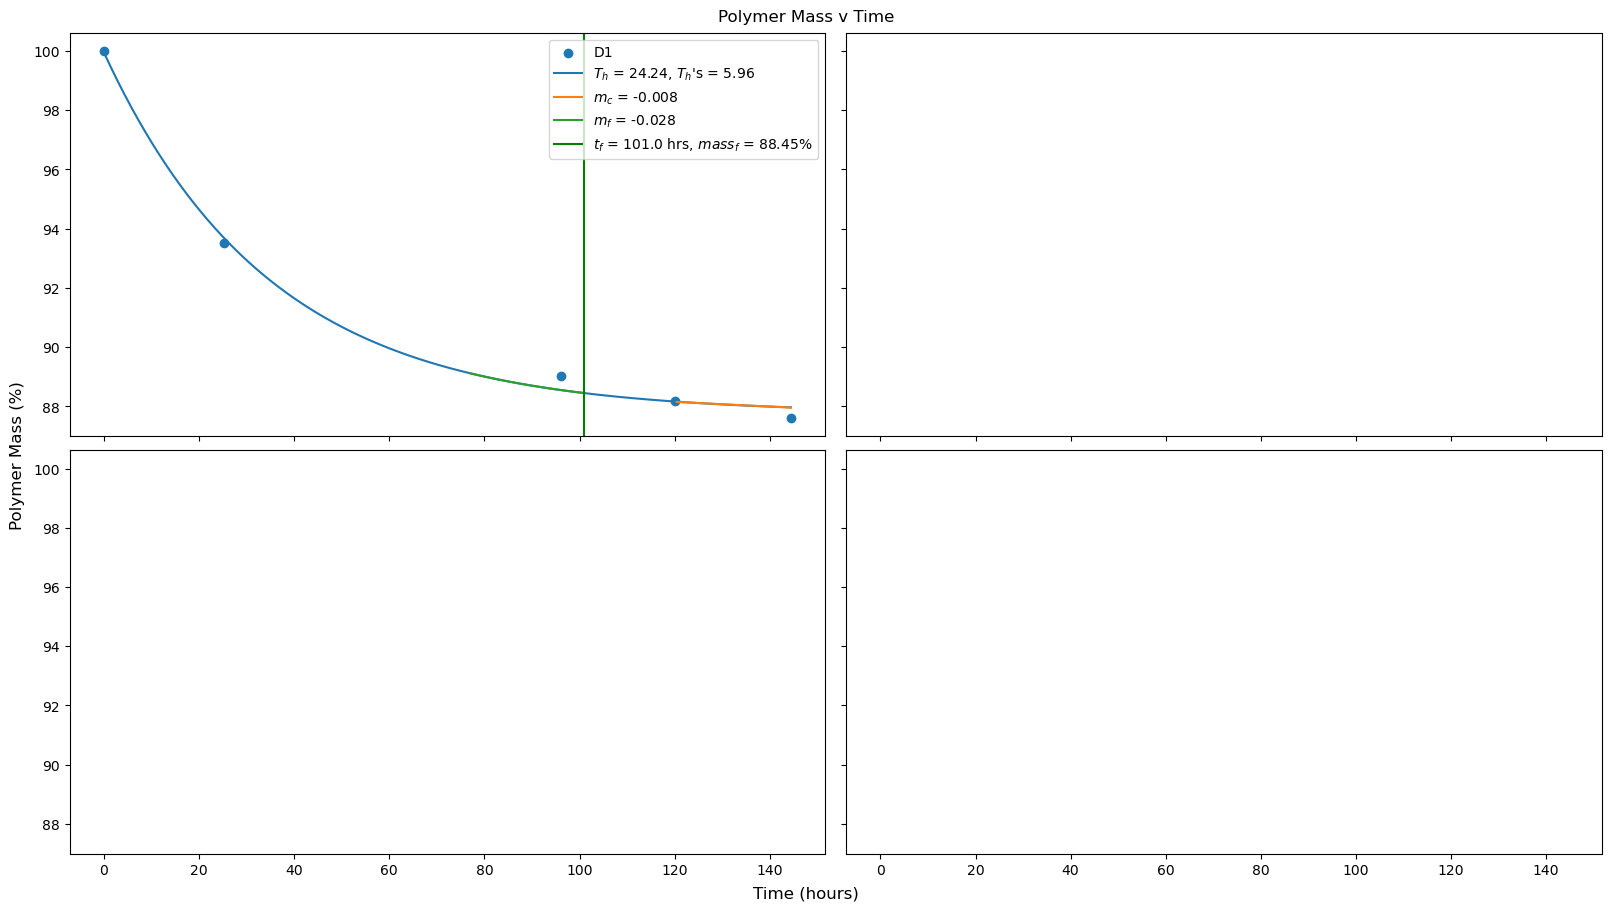

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-3
CSVPath3_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-3.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Dataframes 2 and 4 are read in to find moulds that are different between them.
df2 = pd.read_csv(CSVPath2_str)
df4 = pd.read_csv(CSVPath4_str)
# This mould difference tells us what we are currently interested in.
old_moulds = list(set(df4["mould_position"]))
all_moulds = list(set(df2["mould_position"]))
current_moulds = [x for x in all_moulds if x not in old_moulds]
# We then remove all rows in the dataframes pertaining to the old moulds
df1 = pd.read_csv(CSVPath1_str)
for _ in old_moulds:
    df1 = df1[df1["mould_position"].str.contains(_)==False]
# We then remove all rows in the dataframes pertaining to the old moulds
df2 = pd.read_csv(CSVPath2_str)
for _ in old_moulds:
    df2 = df2[df2["mould_position"].str.contains(_)==False]
# And reset the indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# Read in the CSV3 as df3
df3 = pd.read_csv(CSVPath3_str)

# Exponential function defined
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Linear function defined
def lin_func(x, m, c):
    return m * x + c

# Format the datetime correctly.
df2['datetime'] = pd.to_datetime(df2["datetime"], format='%Y-%m-%d %H:%M:%S')
# Get time elapsed since start of measurements in hours
time_hours_arr = []
for i in df2['datetime']:
    mould_pos = np.array(df2.loc[df2['datetime'] == i, 'mould_position'])[0]
    earliest_time_idx_4_mould_pos = np.array(df2["mould_position"]).tolist().index(f"{mould_pos}")
    time_hours_arr.append((i - df2.datetime[earliest_time_idx_4_mould_pos]).total_seconds() / 3600)
df2['time_hours'] = time_hours_arr

# Get mass in % of original mass
polymer_mass_pct_arr = []
for timestamp,mass in zip(df2['datetime'],df2['polymer_mass_g']):
    mould_pos = np.array(df2.loc[df2['datetime'] == timestamp, 'mould_position'])[0]
    earliest_time_idx_4_mould_pos = np.array(df2["mould_position"]).tolist().index(f"{mould_pos}")
    polymer_mass_pct_arr.append((mass / df2.polymer_mass_g[earliest_time_idx_4_mould_pos]) * 100)
df2['polymer_mass_pct'] = polymer_mass_pct_arr

# Number of Moulds
NoM = len(df1["mould_position"])
plots_hi = int(np.ceil(NoM/2))
plots_wi = 2

# To make sure the plotting system still functions, we must assure a grid formation.
if plots_hi < 2:
    plots_hi = 2

# Mould's Plots
plot_arr = []
for _ in range(plots_wi):
    for __ in range(plots_hi):
        plot_arr.append((__,_))

# Plot Setup
fig, axs = plt.subplots(plots_hi, plots_wi, sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Polymer Mass v Time')
fig.set_size_inches(16, 9)
fig.supxlabel('Time (hours)')
fig.supylabel('Polymer Mass (%)')

for ax,_ in zip(plot_arr,df1["mould_position"]):
    x_arr = np.array(df2.loc[df2['mould_position'] == _, 'time_hours'])
    y_arr = np.array(df2.loc[df2['mould_position'] == _, 'polymer_mass_pct'])

    exp_a_arr = np.array(df3.loc[df3['mould_position'] == _, 'exp_param_a'])
    exp_b_arr = np.array(df3.loc[df3['mould_position'] == _, 'exp_param_b'])
    exp_c_arr = np.array(df3.loc[df3['mould_position'] == _, 'exp_param_c'])

    lin_m_arr = np.array(df3.loc[df3['mould_position'] == _, 'lin_param_m'])
    lin_c_arr = np.array(df3.loc[df3['mould_position'] == _, 'lin_param_c'])

    axs[ax].scatter(x_arr,y_arr,label=f"{_}")

    x_exp_linspaced_arr = np.linspace(0,x_arr[len(x_arr)-1],100)
    axs[ax].plot(x_exp_linspaced_arr, exp_func(x_exp_linspaced_arr, * [exp_a_arr[len(exp_a_arr)-1],exp_b_arr[len(exp_b_arr)-1],exp_c_arr[len(exp_c_arr)-1]]),label=f"$T_h$ = {round((np.log(2)/exp_b_arr[len(exp_b_arr)-1]),2)}, $T_h$'s = {round((x_arr[len(x_arr)-1])/(np.log(2)/exp_b_arr[len(exp_b_arr)-1]),2)}")

    x_lin_linspaced_arr = np.linspace(x_arr[len(x_arr)-1]-24,x_arr[len(x_arr)-1],100)
    axs[ax].plot(x_lin_linspaced_arr, lin_func(x_lin_linspaced_arr, * [lin_m_arr[len(lin_m_arr)-1],lin_c_arr[len(lin_c_arr)-1],]),label=f"$m_c$ = {lin_m_arr[len(lin_m_arr)-1]}")

    # All the hours for sample
    hours_arr = np.linspace(int(round(x_arr[0],0)),int(round(x_arr[len(x_arr)-1],0)),int(round(x_arr[len(x_arr)-1],0))+1)

    for hour in hours_arr:
        # Create the x's for the last 24 hours
        x_last24exp_arr = np.linspace(hour-24,hour,100)
        # Estimate the last 24 hours of data using the exponential fitted
        y_last24exp_arr = exp_func(x_last24exp_arr,exp_a_arr[len(exp_a_arr)-1],exp_b_arr[len(exp_b_arr)-1],exp_c_arr[len(exp_c_arr)-1])
        # Fit a linear function to the forecast, m (% hr^-1) can then be obtained
        popt_lin, pcov_lin = curve_fit(lin_func, x_last24exp_arr, y_last24exp_arr, p0=[((y_last24exp_arr[len(y_last24exp_arr)-1] - y_last24exp_arr[0])/(x_last24exp_arr[len(x_last24exp_arr)-1] - x_last24exp_arr[0])),75])
        if popt_lin[0] > -0.028:
            t_final_int = hour
            m_final_int = round(popt_lin[0],3)
            m_pct_final_int = round(exp_func(hour,exp_a_arr[len(exp_a_arr)-1],exp_b_arr[len(exp_b_arr)-1],exp_c_arr[len(exp_c_arr)-1]),2)
            axs[ax].plot(x_last24exp_arr,y_last24exp_arr,label=f"$m_f$ = {m_final_int}")
            break
        else:
            t_final_int = 0
            m_final_int = 0
            m_pct_final_int = 0

    axs[ax].axvline(t_final_int, c="green", label=f"$t_f$ = {t_final_int} hrs, $mass_f$ = {m_pct_final_int}%")

    axs[ax].legend(loc="upper right")

Text(0, 0.5, 'Polymer Mass (%)')

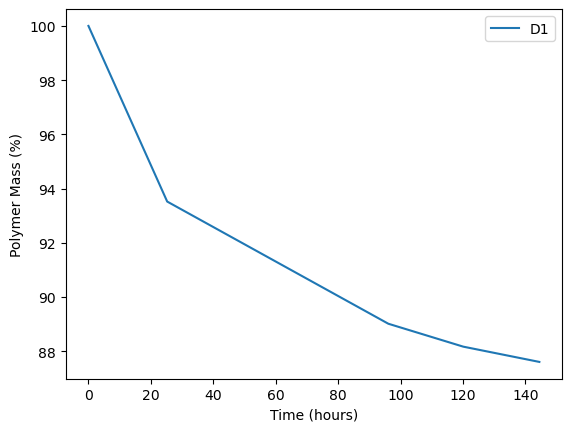

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Dataframes 2 and 4 are read in to find moulds that are different between them.
df2 = pd.read_csv(CSVPath2_str)
df4 = pd.read_csv(CSVPath4_str)
# This mould difference tells us what we are currently interested in.
old_moulds = list(set(df4["mould_position"]))
all_moulds = list(set(df2["mould_position"]))
current_moulds = [x for x in all_moulds if x not in old_moulds]
# We then remove all rows in the dataframes pertaining to the old moulds
df1 = pd.read_csv(CSVPath1_str)
for _ in old_moulds:
    df1 = df1[df1["mould_position"].str.contains(_)==False]
# We then remove all rows in the dataframes pertaining to the old moulds
df2 = pd.read_csv(CSVPath2_str)
for _ in old_moulds:
    df2 = df2[df2["mould_position"].str.contains(_)==False]
# And reset the indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# Format the datetime correctly.
df2['datetime'] = pd.to_datetime(df2["datetime"], format='%Y-%m-%d %H:%M:%S')
# Get time elapsed since start of measurements in hours
time_hours_arr = []
for i in df2['datetime']:
    mould_pos = np.array(df2.loc[df2['datetime'] == i, 'mould_position'])[0]
    earliest_time_idx_4_mould_pos = np.array(df2["mould_position"]).tolist().index(f"{mould_pos}")
    time_hours_arr.append((i - df2.datetime[earliest_time_idx_4_mould_pos]).total_seconds() / 3600)
df2['time_hours'] = time_hours_arr
# Drop any irrelevant columns
df2.drop(["datetime", "mould_polymer_mass_g", "mould_mass_g"], axis=1, inplace=True)
# Generate a column of polymer mass loss in % rather than g
df2["polymer_mass_%"] = df2["polymer_mass_g"]

# Loop through the fresh dataframes to generate a plot of mass loss over time in %
for _,__ in zip(df1["mould_position"], df1["polymer_mass_g"]):
    alt_df = df2.loc[df2['mould_position'] == _]
    alt_df["polymer_mass_%"] = (alt_df["polymer_mass_g"] / __) * 100
    x_arr = alt_df["time_hours"]
    y_arr = alt_df["polymer_mass_%"]
    plt.plot(x_arr,y_arr,label=f"{_}")
    plt.legend()

plt.xlabel("Time (hours)")
plt.ylabel("Polymer Mass (%)")

# Stykke-4

In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Path of the CSV file for Stykke-1
CSVPath1_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-1.csv"
# Path of the CSV file for Stykke-2
CSVPath2_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-2.csv"
# Path of the CSV file for Stykke-3
CSVPath3_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-3.csv"
# Path of the CSV file for Stykke-4
CSVPath4_str = "/Users/raw-data_2023-03-15_PtB1-PGCI-BOpt-[8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]-P3O1-Stykke-4.csv"

# Dataframes 2 and 4 are read in to find moulds that are different between them.
df2 = pd.read_csv(CSVPath2_str)
df4 = pd.read_csv(CSVPath4_str)
# This mould difference tells us what we are currently interested in.
old_moulds = list(set(df4["mould_position"]))
all_moulds = list(set(df2["mould_position"]))
current_moulds = [x for x in all_moulds if x not in old_moulds]
# We then remove all rows in the dataframes pertaining to the old moulds
df1 = pd.read_csv(CSVPath1_str)
for _ in old_moulds:
    df1 = df1[df1["mould_position"].str.contains(_)==False]
# We then remove all rows in the dataframes pertaining to the old moulds
df2 = pd.read_csv(CSVPath2_str)
for _ in old_moulds:
    df2 = df2[df2["mould_position"].str.contains(_)==False]
# And reset the indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# Read in the CSV3 as df3
df3 = pd.read_csv(CSVPath3_str)

# Exponential function defined
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Linear function defined
def lin_func(x, m, c):
    return m * x + c

# Values brought together and placed in final csv
for mould in df1["mould_position"]:
    a_arr = np.array(df3.loc[df3['mould_position'] == mould, 'exp_param_a'])
    b_arr = np.array(df3.loc[df3['mould_position'] == mould, 'exp_param_b'])
    c_arr = np.array(df3.loc[df3['mould_position'] == mould, 'exp_param_c'])
    t_elapsed_arr = np.array(df3.loc[df3['mould_position'] == mould, 'time_elapsed_hours'])
    a_sca = a_arr[len(a_arr)-1]
    b_sca = b_arr[len(b_arr)-1]
    c_sca = c_arr[len(c_arr)-1]
    t_elapsed_sca = t_elapsed_arr[len(t_elapsed_arr)-1]
    hours_arr = np.linspace(0,int(t_elapsed_sca),int(t_elapsed_sca)+1)

    for hour in hours_arr:
        # Create the x's for the last 24 hours
        x_last24exp_arr = np.linspace(hour-24,hour,100)
        # Estimate the last 24 hours of data using the exponential fitted
        y_last24exp_arr = exp_func(x_last24exp_arr,a_sca,b_sca,c_sca)
        # Fit a linear function to the forecast, m (% hr^-1) can then be obtained
        popt_lin, pcov_lin = curve_fit(lin_func, x_last24exp_arr, y_last24exp_arr, p0=[((y_last24exp_arr[len(y_last24exp_arr)-1] - y_last24exp_arr[0])/(x_last24exp_arr[len(x_last24exp_arr)-1] - x_last24exp_arr[0])),75])
        if popt_lin[0] > -0.028:
            t_final_int = hour
            m_final_int = round(popt_lin[0],3)
            m_pct_final_int = exp_func(hour,a_sca,b_sca,c_sca)
            break
        else:
            t_final_int = 0
            m_final_int = 0
            m_pct_final_int = 0
    
    GStoich_sca = np.array(df1.loc[df1['mould_position'] == mould, 'G_stoichiometry'])[0]
    CAStoich_sca = np.array(df1.loc[df1['mould_position'] == mould, 'CA_stoichiometry'])[0]
    IAStoich_sca = np.array(df1.loc[df1['mould_position'] == mould, 'IA_stoichiometry'])[0]
    x1_sca = np.array(df1.loc[df1['mould_position'] == mould, 'x1'])[0]
    x2_sca = np.array(df1.loc[df1['mould_position'] == mould, 'x2'])[0]
    x3_sca = np.array(df1.loc[df1['mould_position'] == mould, 'x3'])[0]
    StartMass_g_sca = np.array(df1.loc[df1['mould_position'] == mould, 'polymer_mass_g'])[0]
    EndMass_pct_sca = m_pct_final_int
    DeltaMassLoss_pct_sca = -1 * (100 - m_pct_final_int)


    # Read in version so far of the dataframe
    df4 = pd.read_csv(CSVPath4_str)
    # Placing the newfound information into the dataframe we are dealing with
    df4.loc[-1] = [mould, GStoich_sca, CAStoich_sca, IAStoich_sca, x1_sca, x2_sca, x3_sca, StartMass_g_sca, EndMass_pct_sca, DeltaMassLoss_pct_sca]
    # Saving the dataframe as a CSV overwriting the original CSV read in.
    df4.to_csv(CSVPath4_str, index=False)